In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

data_path = 'C:\\Users\\mehedee\\Documents\\data\\course\\UDEMY_TSA_FINAL\\Data\\'
df1 = pd.read_csv(data_path+'airline_passengers.csv',index_col='Month',parse_dates=True)
# index_col='Date',parse_dates=True
df1.index.freq ='MS'

df2 = pd.read_csv(data_path+'DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'


### choosing parameters
- pip install pmdarima

In [20]:
from pmdarima import auto_arima

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# help(auto_arima)

In [8]:
# for stationary data set non seasonal data

In [23]:
stepwise_fit = auto_arima(df2['Births'],start_p=0,start_q=10,max_p= 10,max_q=10,seasonal=False,trace=True) # we only ACF 

Fit ARIMA: order=(0, 1, 10); AIC=2465.930, BIC=2512.696, Fit time=29.661 seconds
Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.119 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.303 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.581 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.515, BIC=2480.000, Fit time=1.894 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2461.874, BIC=2485.257, Fit time=2.642 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.787 seconds
Total fit time: 36.030 seconds


In [24]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Fri, 26 Jun 2020   AIC                           2460.154
Time:                        11:27:08   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [26]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'],start_p=0,start_q=0,max_p=4,max_q=4,seasonal=True,trace=True,m=12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=1032.499, BIC=1044.000, Fit time=1.929 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1032.099, BIC=1037.850, Fit time=0.097 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1021.925, BIC=1033.426, Fit time=4.209 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.387, BIC=1033.888, Fit time=2.320 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.300, BIC=1030.926, Fit time=0.761 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=1020.731, BIC=1035.107, Fit time=7.820 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1016.584, BIC=1033.835, Fit time=33.044 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1032.074, BIC=1046.450, Fit time=15.768 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1017.543, BIC=1037.670, Fit time=13.452 seconds
Fit ARIMA: order=(1, 1, 1

In [28]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -499.361
Date:                            Fri, 26 Jun 2020   AIC                           1014.722
Time:                                    11:45:40   BIC                           1037.723
Sample:                                         0   HQIC                          1024.068
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.017      0.020      0.984      -0.034       0.035
ar.L1          0.5278      0.103      5.134      0.000       0.326       0.729
ar.L2          0.2574      0.105      2.459      0.014       0.052       0.463
ma.L1         -0.9706      0.063    -15.420      0.000      -1.094      -0.847
ar.S.L12       0.6969      0.386      1.803      0.071      -0.061       1.454
ar.S.L24       0.2944      0.134      2.203      0.028       0.032       0.556
ma.S.L12      -0.9583      1.054     -0.909      0.363      -3.025       1.108
sigma2       116.9491     69.844      1.674      0.094     -19.943     253.841
===================================================================================
Ljung-Box (Q):                       53.71   Jarque-Bera (JB):                12.51
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               2.79   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
from statsmodels.tsa.arima_model import ARMA ,ARIMA,ARMAResults,ARIMAResults

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [32]:
from pmdarima import auto_arima

In [42]:
df3 = df2[:120]

In [35]:
df4 = pd.read_csv(data_path+'TradeInventories.csv',index_col='Date',parse_dates=True)
df4.index.freq = 'MS'

## ARMA


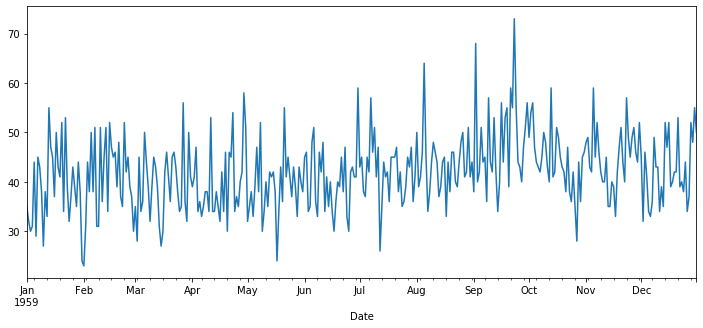

In [36]:
df2['Births'].plot(figsize=(12,5))

In [ ]:
# augmented dicki

In [37]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [44]:
adf_test(df3['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [46]:
# df3['Births'].plot()

In [43]:
auto_arima(df3['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(0, 0)   Log Likelihood                -409.745
Method:                           css   S.D. of innovations              7.357
Date:                Fri, 26 Jun 2020   AIC                            823.489
Time:                        12:10:51   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7833      0.672     59.240      0.000      38.467      41.100
==============================================================================
"""

In [47]:
auto_arima(df3['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(0, 0)   Log Likelihood                -409.745
Method:                           css   S.D. of innovations              7.357
Date:                Fri, 26 Jun 2020   AIC                            823.489
Time:                        12:27:56   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7833      0.672     59.240      0.000      38.467      41.100
==============================================================================
"""

In [49]:
train = df3.iloc[:90]
test = df3.iloc[90:]

In [50]:
model = ARMA(train['Births'],order=(2,2))

In [52]:
results= model.fit()

In [54]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Fri, 26 Jun 2020   AIC                            627.809
Time:                        13:36:47   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [55]:
start = len(train)
end = len(train) + len(test) -1

In [56]:
predictions = results.predict(start,end).rename('ARMA (2,2) predictions')

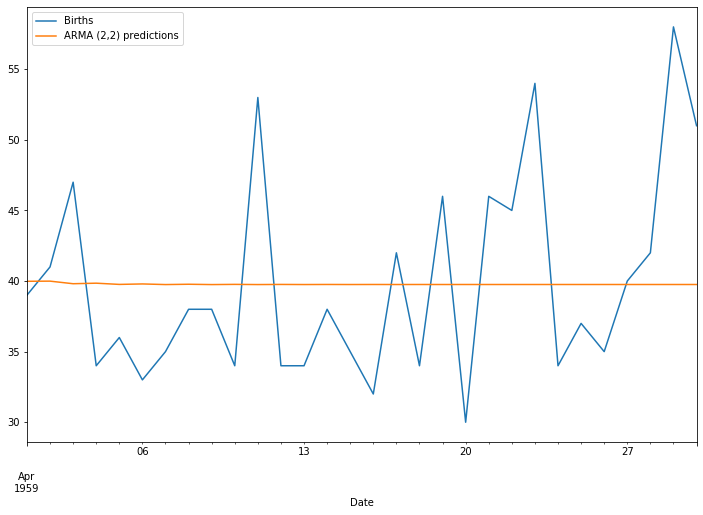

In [61]:
test["Births"].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

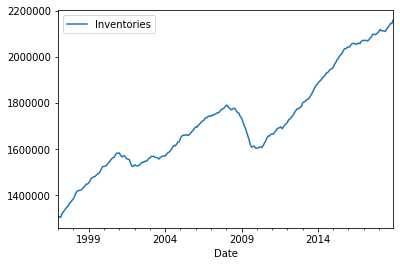

In [62]:
df4.plot()

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

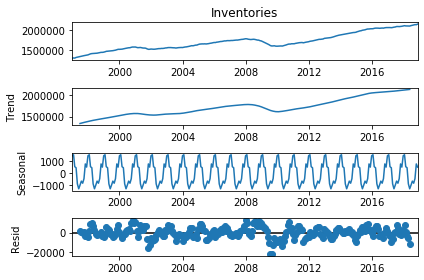

In [69]:
result = seasonal_decompose(df4['Inventories'],model='add')
result.plot();

In [70]:
auto_arima(df4['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.257
Date:                Fri, 26 Jun 2020   AIC                           5228.505
Time:                        13:59:23   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3476.9088   1313.887      2.646      0.008     901.737    6052.081
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

In [71]:
from statsmodels.tsa.statespace.tools import diff

In [72]:
df4['Diff_1'] = diff(df4['Inventories'],k_diff=1)

In [73]:
adf_test(df4['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


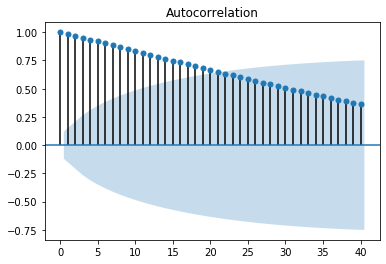

In [75]:
plot_acf(df4['Inventories'],lags=40);

In [79]:
# this is the lowest 
# why bother auto arima can do for you


In [80]:
len(df4)

264

In [77]:
stepwise_fit=auto_arima(df4['Inventories'])

ValueError: Could not successfully fit ARIMA to input data. It is likely your data is non-stationary. Please induce stationarity or try a different range of model order params. If your data is seasonal, check the period (m) of the data.

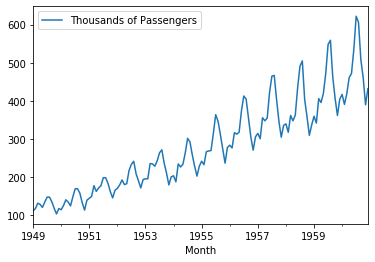

In [2]:
df1.plot()

In [3]:
from statsmodels.tsa.stattools import adfuller


In [4]:
adfuller(df1['Thousands of Passengers'])

(0.8354917850645236,
 0.9921879994073066,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.8050258890497)

In [5]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

In [6]:
dftest = adfuller(df1['Thousands of Passengers'])

In [15]:
dfout = pd.Series(dftest[0:4],index=['ADF Test Statistics','p-value','# Lags Used', '# Observations'])

In [16]:
for key,val in dftest[4].items():
    dfout[f'critical values ({key})'] = val

In [17]:
dfout

ADF Test Statistics        0.835492
p-value                    0.992188
# Lags Used               13.000000
# Observations           130.000000
critical values (1%)      -3.481682
critical values (5%)      -2.884042
critical values (10%)     -2.578770
dtype: float64

In [18]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [19]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.835492
p-value                   0.992188
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


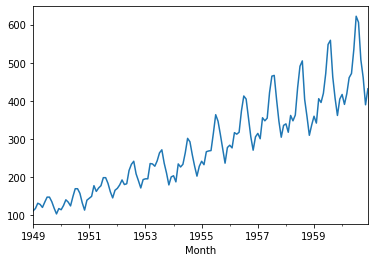

In [20]:
df1['Thousands of Passengers'].plot()

In [22]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [14]:
data_path

'C:\\Users\\mehedee\\Documents\\data\\course\\UDEMY_TSA_FINAL\\Data\\'

In [15]:
df3 = pd.read_csv(data_path+'samples.csv',index_col=0,parse_dates=True)

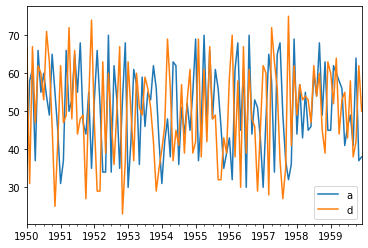

In [16]:
df3[['a','d']].plot()

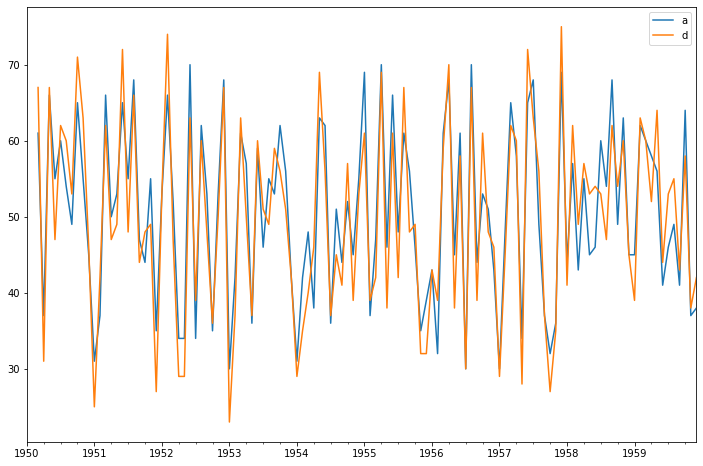

In [19]:
df3['a'].iloc[2:].plot(figsize=(12,8),legend=True)
df3['d'].shift(2).plot(legend=True)

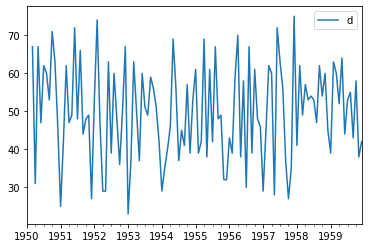

In [20]:
from statsmodels.tsa.stattools import grangercausalitytests

In [24]:
grangercausalitytests(df3[['a','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [25]:
grangercausalitytests(df3[['b','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


In [26]:
 # evaluating forecasting
    

In [10]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])

In [11]:
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


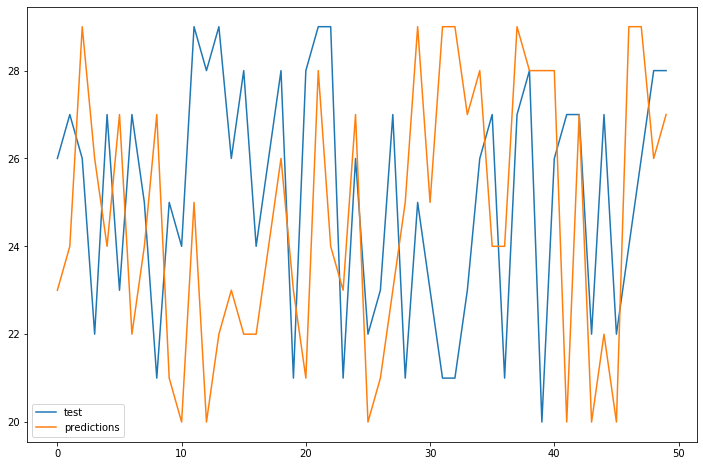

In [12]:
df.plot(figsize=(12,8))

In [13]:
from sklearn.metrics import mean_absolute_error


In [14]:
from statsmodels.tools.eval_measures import mse,rmse ,meanabs

In [15]:
mse(df['test'],df['predictions'])

17.02

In [16]:
# visualize seasonality

df = pd.read_csv(data_path+'airline_passengers.csv',index_col='Month',parse_dates=True)

In [17]:
df.index.freq='MS'

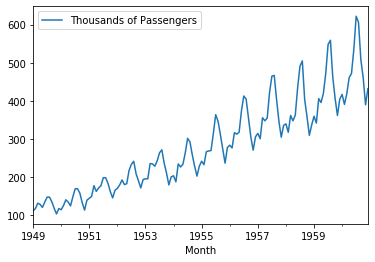

In [18]:
df.plot()

In [19]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

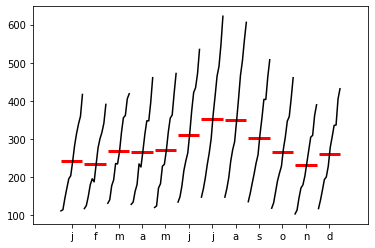

In [20]:
month_plot(df['Thousands of Passengers']);